# Questions
- There are a lot of outliers, should I still remove them all? when do you know if to remove/ replace with a different value (mean etc.)
- Should I have had used train, test also for KNN?
- How to do cross-validation for OLS
- My results for OLS

## In this notebook, KNN regression will be compared with OLS regression and see which one is preferred for this dataset and also maybe why

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors, model_selection, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
# import the boston house-prices dataset
boston = datasets.load_boston()
# loading to a dataframe
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# adding the target to the dataframe
boston_df['MEDV'] = datasets.load_boston().target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<pre>
CRIM          per capita crime rate by town
ZN            proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS         proportion of non-retail business acres per town
CHAS          Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX           nitric oxides concentration (parts per 10 million)
RM            average number of rooms per dwelling
AGE           proportion of owner-occupied units built prior to 1940
DIS           weighted distances to five Boston employment centres
RAD           index of accessibility to radial highways
TAX           full-value property-tax rate per 10,000 dollar
PTRATIO       pupil-teacher ratio by town
B             1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT         % lower status of the population
MEDV          Median value of owner-occupied homes in 1000’s dollar
</pre>

In [4]:
# df information
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


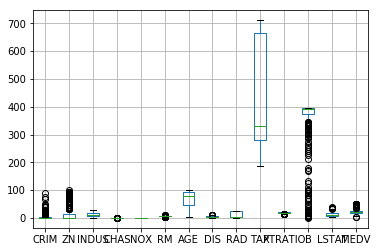

In [5]:
# check for outliers 
boston_df.boxplot()

In [6]:
# how many outliers there are
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1

print("\ntotal number of outliers:")
print(((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))).sum())



total number of outliers:
CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64


In [7]:
# remove outliers
print("Before removal, the length of the df is: {}\n".format(len(boston_df)))

# removing using IQR * 1.5
boston_df = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After removal, the length of the df is: {}\n".format(len(boston_df)))

# reset indexes
boston_df.reset_index(drop=True, inplace=True)

# show table
boston_df.head()

Before removal, the length of the df is: 506

After removal, the length of the df is: 268



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


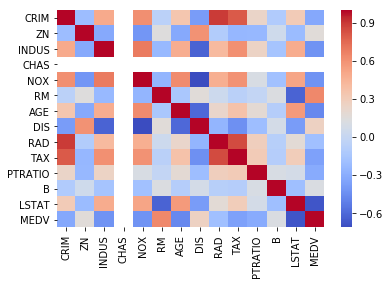

In [8]:
# check for correlation
correlation = boston_df.corr()

# see in heatmap 
sns.heatmap(correlation, cmap='coolwarm')

To simplify the model and not to get overwhelmed, I'll only use these 4 features: RM, TAX, AGE, INDUS, LSTAT

In [9]:
boston_df = boston_df[['RM', 'TAX', 'AGE', 'LSTAT', 'MEDV']]

boston_df.head()

,RM,TAX,AGE,LSTAT,MEDV
0,6.575,296.0,65.2,4.98,24.0
1,6.421,242.0,78.9,9.14,21.6
2,7.185,242.0,61.1,4.03,34.7
3,6.998,222.0,45.8,2.94,33.4
4,7.147,222.0,54.2,5.33,36.2


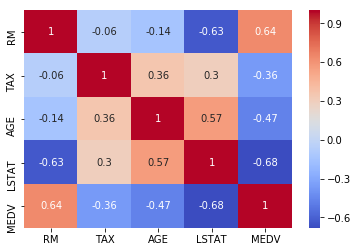

In [10]:
# check for correlation
correlation = boston_df.corr().round(2)

# see in heatmap 
sns.heatmap(correlation, cmap='coolwarm', annot=True)

In [11]:
# independent and target sets
X = boston_df[['RM', 'TAX', 'AGE', 'LSTAT']]
y = boston_df['MEDV']

Text(0, 0.5, 'MEDV')

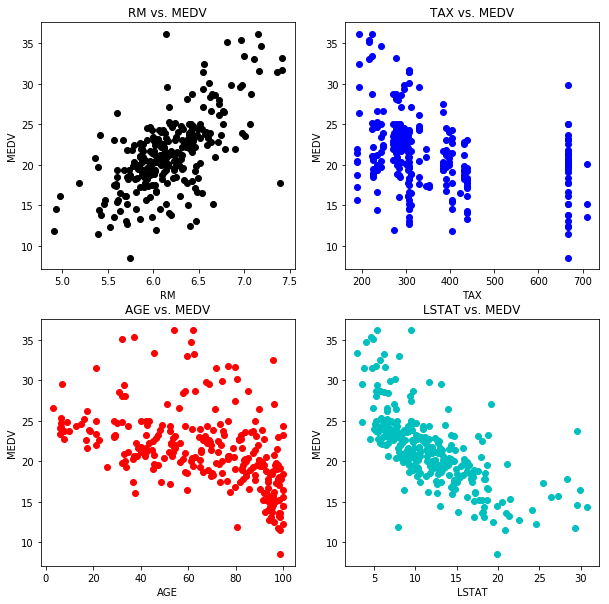

In [12]:
# visualize the data
f, axs = plt.subplots(2,2,figsize=(10,10))

plt.subplot(2, 2, 1)
plt.scatter(X['RM'], y, color='k')
plt.title('RM vs. MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

plt.subplot(2, 2, 2)
plt.scatter(X['TAX'], y, color='b')
plt.title('TAX vs. MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')

plt.subplot(2, 2, 3)
plt.scatter(X['AGE'], y, color='r')
plt.title('AGE vs. MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')

plt.subplot(2, 2, 4)
plt.scatter(X['LSTAT'], y, color='c')
plt.title('LSTAT vs. MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Next, KNN regression

Text(0.5, 1.0, 'Predection vs. Actual MEDV - KNN')

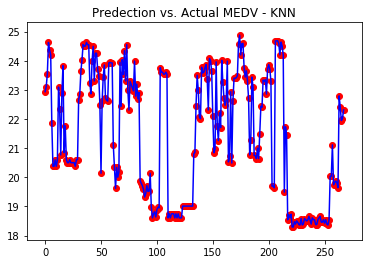

In [13]:
knn = neighbors.KNeighborsRegressor(n_neighbors=45)
knn.fit(X, y)
y_pred = knn.predict(X)

T = np.arange(0, len(y_pred), 1).reshape(-1,1)

plt.plot(y_pred, color='b')
plt.scatter(T, y_pred, color='r')
plt.title("Predection vs. Actual MEDV - KNN")

In [14]:
score = cross_val_score(knn, X, y_pred, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.82 (+/- 0.18)


Next, Regular regression

In [15]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# finding R^2
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))


Coefficients: 
 [ 5.21094102 -0.0060202  -0.03767276 -0.17100171]

Intercept: 
 -3.819333407601448

R-squared:
0.6592106846084465


In [16]:
score = cross_val_score(regr, X, y_pred, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -1.16 (+/- 7.66)


### Explanation:
